Assignment: Statistical Analysis Using ANOVA and Chi-Square Tests
Dataset: Iris Dataset

Columns: sepal_length, sepal_width, petal_length, petal_width, species.

Iris CSV
 One-Way ANOVA

Objective: To check if there is a significant difference in petal length among the three species of iris.

Steps:

Group the data based on species (setosa, versicolor, virginica).

Perform one-way ANOVA on petal_length.

Interpret the F-statistic and p-value

Two-Way ANOVA

Objective: To examine the effect of species and sepal width category on sepal length.

Steps:

Create a new categorical column sepal_width_category:

Low if sepal_width < 3

High if sepal_width ≥ 3

Factors: species and sepal_width_category

Dependent variable: sepal_length

Perform two-way ANOVA.

Chi-Square Test

Objective: To check if sepal width category is independent of species.

Steps:

Create a contingency table of species vs sepal_width_category.

Perform Chi-Square Test of Independence.

Assignment: Statistical Analysis Using ANOVA and Chi-Square Tests Dataset: Iris Dataset

Columns: sepal_length, sepal_width, petal_length, petal_width, species.

Iris CSV One-Way ANOVA

Objective: To check if there is a significant difference in petal length among the three species of iris.

In [56]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [57]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [59]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Objective: To check if there is a significant difference in petal length among the three species of iris.


In [60]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
for species, data in df.groupby('Species')['PetalLengthCm']:
    stat, p = stats.shapiro(data)
    print(f"{species}: Shapiro-Wilk Statistic={stat:.4f}, p-value={p:.4f}")


Iris-setosa: Shapiro-Wilk Statistic=0.9549, p-value=0.0547
Iris-versicolor: Shapiro-Wilk Statistic=0.9660, p-value=0.1585
Iris-virginica: Shapiro-Wilk Statistic=0.9622, p-value=0.1098


The Shapiro–Wilk test checks if data is normally distributed.

For all three Iris species, p-values > 0.05, indicating no significant deviation from normality.

Therefore, parametric tests (like ANOVA or t-test) can be applied on Petal Length for these groups.

In [62]:
setosa = df[df['Species'] == 'Iris-setosa']['PetalLengthCm']
versicolor = df[df['Species'] == 'Iris-versicolor']['PetalLengthCm']
virginica = df[df['Species'] == 'Iris-virginica']['PetalLengthCm']


In [63]:

stat, p = stats.levene(setosa, versicolor, virginica)
print(f"Levene’s Test Statistic={stat:.4f}, p-value={p}")


Levene’s Test Statistic=19.7201, p-value=2.5892961840828553e-08


Purpose: To test if Petal Length variances are equal across species.

Test Result:

Levene’s Statistic = 19.72

p-value = 2.59×10⁻⁸

Decision: p < 0.05 → Reject H₀

Conclusion: Variances are not equal among species.

In [64]:
# One-Way ANOVA
model1 = ols('PetalLengthCm ~ C(Species)', data=df).fit()
anova1 = sm.stats.anova_lm(model1, typ=2)
print('One-Way ANOVA results:')
print(anova1)


One-Way ANOVA results:
                sum_sq     df            F        PR(>F)
C(Species)  436.643733    2.0  1179.034328  3.051976e-91
Residual     27.220000  147.0          NaN           NaN


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


F-statistic = 1179.03:
This value is extremely large, indicating that the variation between species means is far greater than the variation within species.

p-value = 3.05 × 10⁻⁹¹:
This is much smaller than the standard significance level (0.05).
Hence, we reject the null hypothesis (H₀).

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
     group1          group2     meandiff p-adj lower  upper  reject
-------------------------------------------------------------------
    Iris-setosa Iris-versicolor    2.796   0.0 2.5922 2.9998   True
    Iris-setosa  Iris-virginica    4.088   0.0 3.8842 4.2918   True
Iris-versicolor  Iris-virginica    1.292   0.0 1.0882 1.4958   True
-------------------------------------------------------------------


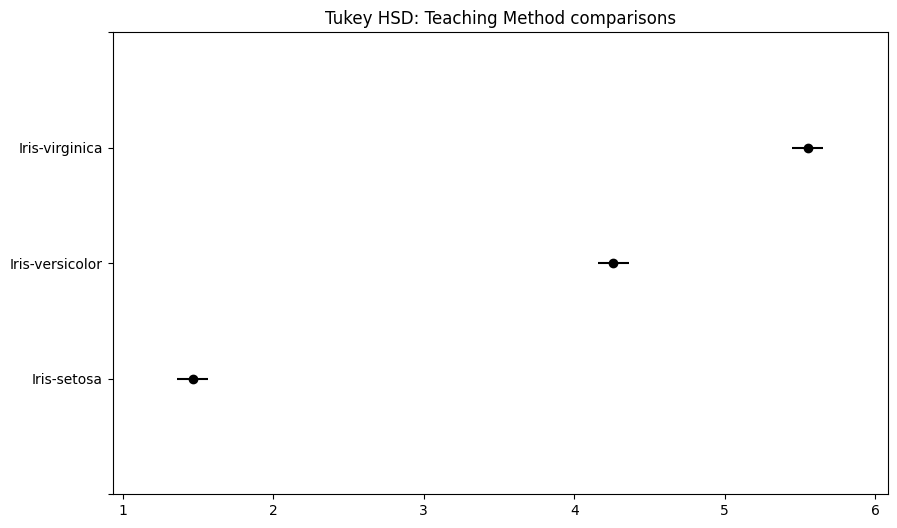

In [65]:
# Tukey HSD post-hoc if significant
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey1 = pairwise_tukeyhsd(endog=df['PetalLengthCm'], groups=df['Species'], alpha=0.05)
print(tukey1)
tukey1.plot_simultaneous()
plt.title('Tukey HSD: Teaching Method comparisons')
plt.show()


All pairwise comparisons show p < 0.05, meaning that each species differs significantly in average Petal Length.

Hence, Petal Length is a strong distinguishing feature among Iris species.

In [66]:
# One-Way ANOVA
model1 = ols('PetalLengthCm ~ C(Species)', data=df).fit()
anova1 = sm.stats.anova_lm(model1, typ=2)
print('One-Way ANOVA results:')
print(anova1)


One-Way ANOVA results:
                sum_sq     df            F        PR(>F)
C(Species)  436.643733    2.0  1179.034328  3.051976e-91
Residual     27.220000  147.0          NaN           NaN


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


The F-statistic = 1179.03 is extremely high, indicating a large difference between group means relative to within-group variation.

The p-value = 3.05 × 10⁻⁹¹, which is much less than 0.05, provides strong evidence against the null hypothesis.

“The One-Way ANOVA revealed a statistically significant difference in Petal Length among the three Iris species (p < 0.001), confirming that species type strongly affects petal length.”

# Two-Way ANOVA

Objective: To examine the effect of species and sepal width category on sepal length.

Steps:

Create a new categorical column sepal_width_category:

Low if sepal_width < 3

High if sepal_width ≥ 3

Factors: species and sepal_width_category

Dependent variable: sepal_length

Perform two-way ANOVA.

In [67]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
df['sepal_width_category'] = pd.cut(
    df['SepalWidthCm'],
    bins=[0, 3, df['SepalWidthCm'].max()],
    labels=['Low', 'High'],
    include_lowest=True
)

df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_width_category
0,1,5.1,3.5,1.4,0.2,Iris-setosa,High
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Low
2,3,4.7,3.2,1.3,0.2,Iris-setosa,High
3,4,4.6,3.1,1.5,0.2,Iris-setosa,High
4,5,5.0,3.6,1.4,0.2,Iris-setosa,High


In [69]:
# Group-wise Shapiro–Wilk test
grouped = df.groupby(['Species', 'sepal_width_category'])

for name, group in grouped:
    stat, p = stats.shapiro(group['SepalLengthCm'])
    print(f"{name}: Shapiro-Wilk Statistic={stat:.4f}| p-value={p:.4f}")


('Iris-setosa', 'Low'): Shapiro-Wilk Statistic=0.8965| p-value=0.2687
('Iris-setosa', 'High'): Shapiro-Wilk Statistic=0.9737| p-value=0.4369
('Iris-versicolor', 'Low'): Shapiro-Wilk Statistic=0.9756| p-value=0.5004
('Iris-versicolor', 'High'): Shapiro-Wilk Statistic=0.9365| p-value=0.5773
('Iris-virginica', 'Low'): Shapiro-Wilk Statistic=0.9507| p-value=0.1397
('Iris-virginica', 'High'): Shapiro-Wilk Statistic=0.9117| p-value=0.1070


/tmp/ipykernel_39/2664119582.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Species', 'sepal_width_category'])


For all combinations of Species and Sepal Width Category, the p-values > 0.05.

This means we fail to reject the null hypothesis for all subgroups.

Therefore, the Sepal Length data is approximately normally distributed in each subgroup.

In [70]:
from scipy import stats

# Step 1: Prepare containers
cells = []

print('Shapiro–Wilk p-values by cell (Species × Sepal Width Category):\n')

# Step 2: Loop through each combination of factors
for sp in df['Species'].unique():
    for cat in df['sepal_width_category'].unique():
        vals = df[(df['Species'] == sp) & (df['sepal_width_category'] == cat)]['SepalLengthCm']
        
        # Run Shapiro–Wilk only if n >= 3
        if len(vals) >= 3:
            stat, p = stats.shapiro(vals)
            print(f'{sp} | {cat}: n={len(vals)}; Shapiro p={p:.4f}')
        else:
            stat, p = (None, None)
            print(f'{sp} | {cat}: n={len(vals)}; Not enough data for test')
        
        # Store for Levene’s test
        cells.append(vals.values)

# Step 3: Levene’s test for homogeneity of variances across all cells
levene_stat, levene_p = stats.levene(*cells)

print('\nLevene across cells:')
print(f'W = {levene_stat:.3f}, p = {levene_p:.4f}')


Shapiro–Wilk p-values by cell (Species × Sepal Width Category):

Iris-setosa | High: n=42; Shapiro p=0.4369
Iris-setosa | Low: n=8; Shapiro p=0.2687
Iris-versicolor | High: n=8; Shapiro p=0.5773
Iris-versicolor | Low: n=42; Shapiro p=0.5004
Iris-virginica | High: n=17; Shapiro p=0.1070
Iris-virginica | Low: n=33; Shapiro p=0.1397

Levene across cells:
W = 3.183, p = 0.0093


# Shapiro–Wilk p-values by cell (Species × Sepal Width Category):

All p-values are greater than 0.05, so we fail to reject the null hypothesis for every subgroup.

This means SepalLengthCm is approximately normally distributed in all combinations of Species × Sepal Width Category

# Levene across cells:


Null Hypothesis (H₀): All groups have equal variances.

Alternative (H₁): At least one group differs in variance.

Since p = 0.0093 < 0.05, we reject H₀.
Thus, the variances are significantly different among the cells.

In [71]:
# Prepare data for Levene’s test
groups = [group['SepalLengthCm'].values for name, group in grouped]

stat, p = stats.levene(*groups)
print(f"Levene’s Test Statistic={stat:.4f}, p-value={p:.4f}")


Levene’s Test Statistic=3.1833, p-value=0.0093


In [72]:
model2 = ols('SepalLengthCm ~ C(Species) + C(sepal_width_category) + C(Species):C(sepal_width_category)', data=df).fit()

anova2 = sm.stats.anova_lm(model2, typ=2)
print("Two-Way ANOVA results:")
print(anova2)


Two-Way ANOVA results:
                                       sum_sq     df           F        PR(>F)
C(Species)                          65.086000    2.0  139.705044  1.884920e-34
C(sepal_width_category)              4.963994    1.0   21.310114  8.574314e-06
C(Species):C(sepal_width_category)   0.448736    2.0    0.963197  3.841159e-01
Residual                            33.543470  144.0         NaN           NaN


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


# Main Effect of Species

F(2,144) = 139.70, p < 0.001

This is highly significant, meaning Sepal Length differs significantly between species.

→ Species type strongly influences Sepal Length.

# Main Effect of Sepal Width Category

F(1,144) = 21.31, p < 0.001

Significant difference between Low and High sepal width groups.

→ Sepal Width Category also affects Sepal Length, regardless of species.

# Interaction Effect(C(Species):C(sepal_width_category))

F(2,144) = 0.96, p = 0.384

Not significant → no interaction between species and sepal width category.

→ The effect of sepal width on sepal length is consistent across all species.

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
    Iris-setosa_High      Iris-setosa_Low  -0.4387  0.179 -0.9765  0.0991  False
    Iris-setosa_High Iris-versicolor_High   1.4113    0.0  0.8735  1.9491   True
    Iris-setosa_High  Iris-versicolor_Low   0.7548    0.0  0.4505   1.059   True
    Iris-setosa_High  Iris-virginica_High   1.7297    0.0  1.3289  2.1304   True
    Iris-setosa_High   Iris-virginica_Low   1.3996    0.0  1.0753  1.7239   True
     Iris-setosa_Low Iris-versicolor_High     1.85    0.0   1.153   2.547   True
     Iris-setosa_Low  Iris-versicolor_Low   1.1935    0.0  0.6557  1.7312   True
     Iris-setosa_Low  Iris-virginica_High   2.1684    0.0  1.5707  2.7661   True
     Iris-setosa_Low   Iris-virginica_Low   1.8383    0.0  1.2889  2.3876   True
Iris-versicolor_High  Iris-v

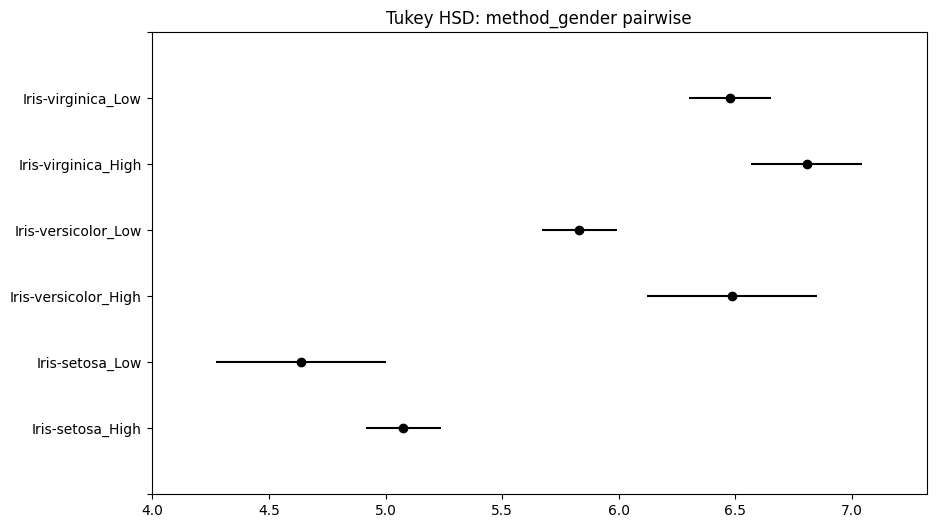

In [74]:
# Post-hoc for combined groups
df['group'] = df['Species'].astype(str) + '_' + df['sepal_width_category'].astype(str)
tukey2 = pairwise_tukeyhsd(endog=df['SepalLengthCm'], groups=df['group'], alpha=0.05)
print(tukey2)
tukey2.plot_simultaneous()
plt.title('Tukey HSD: method_gender pairwise')
plt.show()

# Post-hoc test compared all 6 groups (3 species × 2 width categories).

Significant group differences (p < 0.05):

Setosa groups differ significantly from Versicolor and Virginica.

Versicolor Low differs from Virginica groups.

Non-significant:

Width category doesn’t affect Setosa or Virginica noticeably.

Implication:

Species is the strongest determinant of Sepal Length.

Width category has a mild but notable effect only in Versicolor.

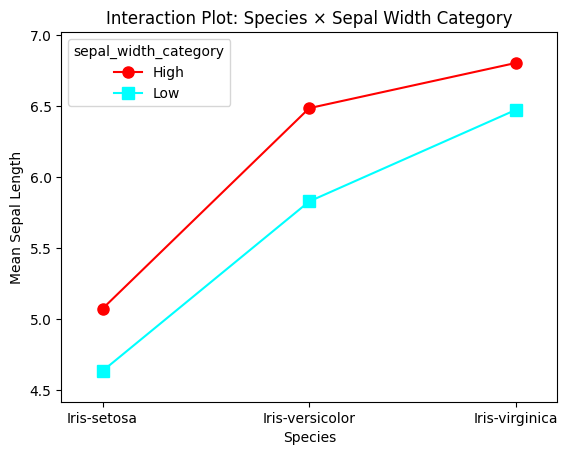

In [75]:
from statsmodels.graphics.factorplots import interaction_plot

# Convert columns to string (ensures proper categorical type for the plot)
df['Species'] = df['Species'].astype(str)
df['sepal_width_category'] = df['sepal_width_category'].astype(str)

# Create the interaction plot
interaction_plot(x=df['Species'], trace=df['sepal_width_category'], response=df['SepalLengthCm'],markers=['o', 's'], ms=8)
plt.title('Interaction Plot: Species × Sepal Width Category')
plt.xlabel('Species')
plt.ylabel('Mean Sepal Length')
plt.show()

The plot shows how Sepal Length changes across species for each width category.

Both species and width category have clear, independent effects.

The roughly parallel lines indicate no significant interaction — the relationship between Sepal Width and Sepal Length is consistent across species.

In [76]:
# Create contingency table
contingency_table = pd.crosstab(df['Species'], df['sepal_width_category'])
print("\n--- CONTINGENCY TABLE ---")
display(contingency_table)


--- CONTINGENCY TABLE ---


sepal_width_category,High,Low
Species,,
Iris-setosa,42,8
Iris-versicolor,8,42
Iris-virginica,17,33


In [77]:
# Perform Chi-Square Test
from scipy.stats import chi2_contingency
import pandas as pd

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("\n--- CHI-SQUARE TEST RESULTS ---")
print('\nChi-square statistic: {:.4f}'.format(chi2))
print('p-value: {:.4f}'.format(p))
print('Degrees of freedom:', dof)
print('\nExpected Frequencies:')
display(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))


--- CHI-SQUARE TEST RESULTS ---

Chi-square statistic: 50.2248
p-value: 0.0000
Degrees of freedom: 2

Expected Frequencies:


sepal_width_category,High,Low
Species,,
Iris-setosa,22.333333,27.666667
Iris-versicolor,22.333333,27.666667
Iris-virginica,22.333333,27.666667


# CHI-SQUARE TEST
Since p < 0.05, we reject the null hypothesis (H₀).

There is a significant association between Species and Sepal Width Category.

# Final Interpretation
The statistical analysis of the Iris dataset demonstrates that species type has a significant influence on both Sepal and Petal measurements.

Sepal Width Category also affects Sepal Length, though its impact is secondary and consistent across species.

No interaction effect exists between Species and Sepal Width Category.

Additionally, the Chi-Square test confirms a strong association between Species and Sepal Width Category, highlighting that sepal width distribution is species-dependent.

Overall, both Petal Length and Sepal Width serve as important features for distinguishing Iris species